## **Imports and loading dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("/content/sample_data/ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

## **Including relevant features**

In [4]:
df = df[["status","card_present_flag","balance","date","txn_description",
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]
df["date"] = pd.to_datetime(df["date"])
df.head()

,status,card_present_flag,balance,date,txn_description,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,POS,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,SALES-POS,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,POS,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,SALES-POS,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,SALES-POS,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


## **Exploratory Data Analysis**

### **Total number of transactions made on each day**

In [5]:
df["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

### **Total number of transactions made by each** **customer**

In [6]:
df["customer_id"].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

### **Transaction volume each day**

In [7]:
df_date_count = df.groupby("date").count()
trans_vol = df_date_count["customer_id"].mean()
n_points = len(df_date_count.index)
n_points

91

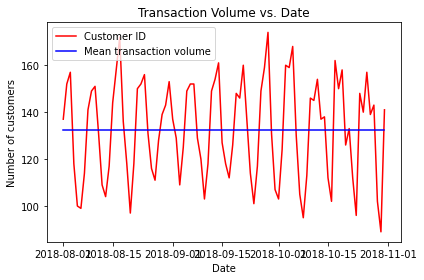

In [8]:
plt.figure()
plt.plot(df_date_count.index, df_date_count["customer_id"], c="r", label = "Customer ID")
plt.plot(df_date_count.index, np.linspace(trans_vol,trans_vol,n_points), c="b", label = "Mean transaction volume")
plt.title("Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()


### **Transaction amount each day**

In [9]:
df_date_mean = df.groupby("date").mean()
trans_amt = df_date_mean["amount"].mean()
n_points = len(df_date_count.index)
n_points

91

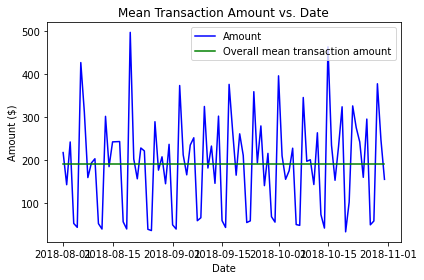

In [10]:
plt.figure()
plt.plot(df_date_count.index, df_date_mean["amount"], c="blue", label = "Amount")
plt.plot(df_date_count.index, np.linspace(trans_amt,trans_amt,n_points), c="green", label = "Overall mean transaction amount")
plt.title("Mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

### **Transaction made by Gender**

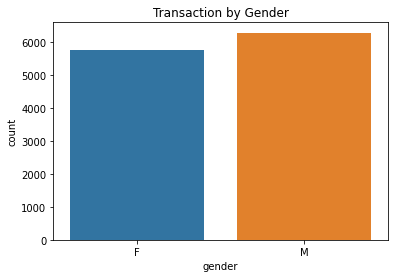

In [11]:
sns.countplot(data=df, x='gender')
plt.title('Transaction by Gender')
plt.show()

### **Transaction made by Status**

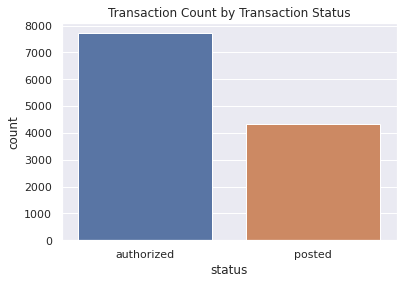

In [12]:
sns.set(style="darkgrid")
sns.countplot(data=df,x='status')
plt.title('Transaction Count by Transaction Status')
plt.show()

### **Transaction made by Transaction Mode**

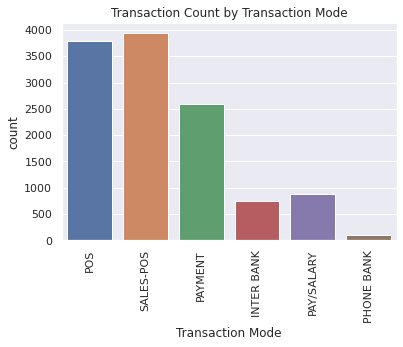

In [13]:
sns.countplot(data=df, x = 'txn_description')
plt.title('Transaction Count by Transaction Mode')
plt.xlabel('Transaction Mode')
plt.xticks(rotation=90)
plt.show()

### **Transaction by States**

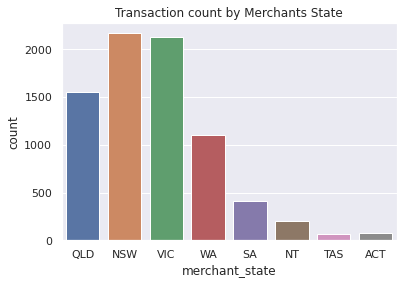

In [14]:
sns.countplot(data=df,x='merchant_state')
plt.title('Transaction count by Merchants State')
plt.show()

### **Transaction by Month**

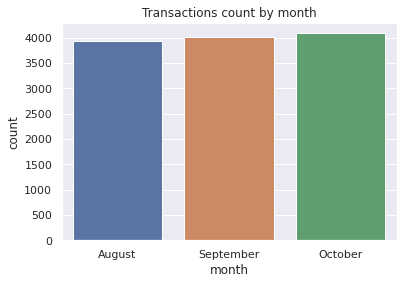

In [15]:
df['month'] = df['date'].dt.month_name()
sns.countplot(data=df, x = 'month')
plt.title('Transactions count by month')
plt.show()

### **Relationship between card present flag and balance**

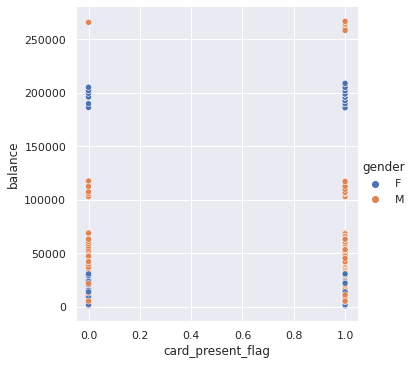

In [16]:
sns.relplot(data=df, x= 'card_present_flag', y='balance', hue='gender')

### **Distribution Plot & Boxplot of Balance Amount**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


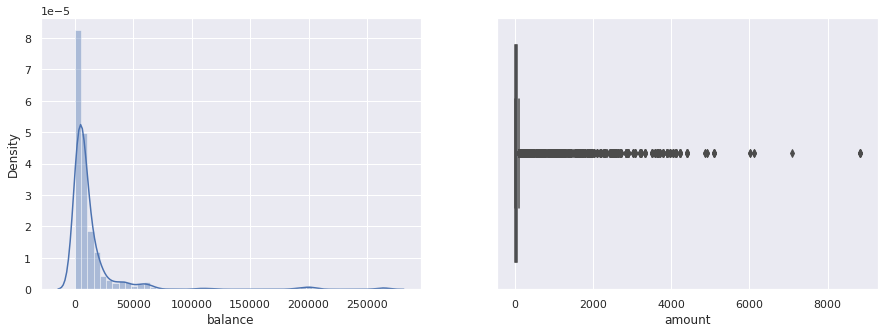

In [26]:
plt.figure(figsize=[15, 5])

plt.subplot(1,2,1)
sns.distplot(df['balance'])

plt.subplot(1,2,2)
sns.boxplot(df['amount'])

### **Distribution Plot & Boxplot of Transaction Amount**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


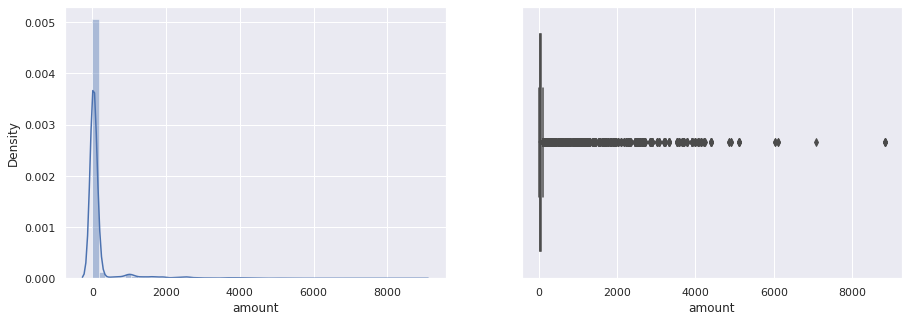

In [27]:
plt.figure(figsize=[15, 5])

plt.subplot(1,2,1)
sns.distplot(df['amount'])

plt.subplot(1,2,2)
sns.boxplot(df['amount'])